# SVM支持向量机
[](attachment:image.png)
<img src=attachment:image.png width=300>

在样本空间中寻找一个超平面
$w^Tx+b=0$
使得

$w^Tx_i+b >= +1, y_i = +1$

$w^Tx_i+b <= -1, y_i = -1$

$\gamma=\frac{2} {||w||}$被称为间隔
我们的目标是找到最大间隔

即$\mathop{max}\limits_{w,b}\frac{2} {||w||}$

等价于$\mathop{min}\limits_{w,b} \frac{1}{2}{||w||}^2$    (似乎机器学习中求最大值的问题都转化成了求最小值)

使用拉格朗日乘数法求解
$L(w, b, \lambda) = \frac{1}{2}{||w||}^2 + \sum\limits_{i=1}^{m}\lambda_i\left(1-y_i\left(w^Tx_i + b\right)\right)$

$\frac{\partial L}{\partial w} = ||w|| + \sum\limits_{i=1}^m\lambda_i(-y_ix_i) = 0$

$\frac{\partial L}{\partial b} = \sum\limits_{i=1}^m-\lambda_iy_i = 0$

解得

$w = \sum\limits_{i=1}^{m}\lambda_iy_ix_i$

$0 = \sum\limits_{i=1}^m\lambda_iy_i$

带入原方程即得到

$\mathop{max}\limits_{\lambda} \sum\limits_{i=1}^m\lambda_i - \frac{1}{2}\sum\limits_{i=1}^{m}\sum\limits_{j=1}^m\lambda_i\lambda_jy_iy_j{x_i}^Tx_j$

使用SMO算法求解$\lambda_i$

1.选出$\lambda$中最不好的两个参数$\lambda_i, \lambda_j$

2.只把$\lambda_i, \lambda_j$视作参数 其他的视作常数，求解$\lambda_i, \lambda_j$


# 使用SVM实现mnist手写数字识别

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

这里直接调用sklearn (不用框架的版本还没写好)

In [7]:
mnist = load_digits()
x,test_x,y,test_y = train_test_split(mnist.data,mnist.target,test_size=0.25,random_state=40)

In [30]:
def load_mnist():
    train_data = pd.read_csv('../dataset/mnist/mnist_train.csv').values
    test_data = pd.read_csv('../dataset/mnist/mnist_test.csv').values

    train_images = train_data[:, 1:]
    train_images = train_images / 255.0
    train_labels_tmp = train_data[:, :1]
    train_images = np.array([i.reshape(-1) for i in train_images])
#     train_labels = np.zeros((len(train_labels_tmp), 10))
#     for i in range(len(train_labels_tmp)):
#         train_labels[i][train_labels_tmp[i]] = 1
#     train_labels = np.array([i.reshape(-1, 1) for i in train_labels])
    train_labels = train_labels_tmp

    test_images = test_data[:, 1:]
    test_images = test_images / 255.0
    test_labels_tmp = test_data[:, :1]
    test_images = np.array([i.reshape(-1) for i in test_images])
#     test_labels = np.zeros((len(test_labels_tmp), 10))
#     for i in range(len(test_labels_tmp)):
#         test_labels[i][test_labels_tmp[i]] = 1
#     test_labels = np.array([i.reshape(-1, 1) for i in test_labels])
    test_labels = test_labels_tmp
    return train_images, train_labels, test_images, test_labels

X_train, y_train, X_test, y_test = load_mnist()

In [36]:
print(X_train.shape, x.shape)
print(y_train.reshape(-1).shape, y.shape)

print(X_test.shape, test_x.shape)

(60000, 784) (1347, 64)
(60000,) (1347,)
(10000, 784) (450, 64)


In [37]:
model = svm.LinearSVC()
model.fit(X_train, y_train.reshape(-1))
z = model.predict(X_test)

C:\Users\13526\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


没收敛 问题不大

In [49]:
print(f'accuracy {np.sum(z == y_test.reshape(-1)) / z.size}')

accuracy 0.9176


还是来个手写数字

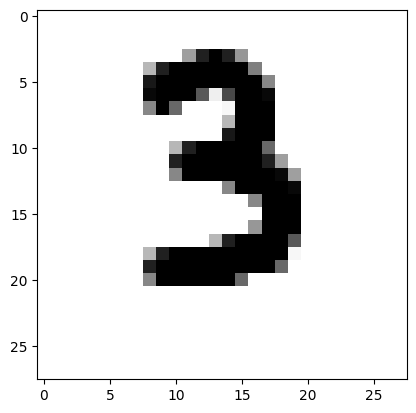

In [44]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('digit.png')
plt.imshow(image)

In [48]:
img = np.dot(np.array(image)[...,:3], [0.299, 0.587, 0.114])
img = 255 - img

r = model.predict(img.reshape(1, -1) / 255.0)
print(r)

[3]
